# Robotic Arm Configuration
## Goal - To plot the joint positions and links for n-dof robotic manipulator

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Function for computing arm configuration

In [3]:
def compute_arm_config(link_lengths, joint_angles, n):
    #compute the (x, y) position of joints and the end effector.
    p_x = []
    p_y = []
    p_x.append(0)
    p_y.append(0)
    for i in range(n):
        #print(sum(joint_angles[:i+1])*180/np.pi,p_x[i])
        p_x.append(p_x[i] + link_lengths[i] * np.cos(sum(joint_angles[:i+1])))
        p_y.append(p_y[i] + link_lengths[i] * np.sin(sum(joint_angles[:i+1])))
    pos = (p_x,p_y)
    return pos

### Generating link lengths and joint angles

In [4]:
##RANDOM GENERATION OF PARAMETERS FOR N DOF

#n = int(input('Enter the degrees of freedom :'))
#link_lengths = np.random.rand(n) * 30 + 20
#joint_angles = np.random.rand(n) * 2 * np.pi

##FIXED DOF ENTER DATA
#link_lengths = np.array([10,10])
#joint_angles = np.array([45,45])* np.pi / 180
#n =2

##ENTERING ALL DATA USING LIST COMPREHENSION
n = int(input('Enter no. of degrees of fredom = '))
joint_angles = input('Enter joint angles in degrees =').split(' ')
joint_angles = [int(i) for i in joint_angles]
joint_angles = np.array(joint_angles) * np.pi/180

link_lengths = input('Enter link lengths =').split(' ')
link_lengths = [int(f) for f in link_lengths]
#print(link_lengths)

#computing positions of end-effector and joint
pos = compute_arm_config(link_lengths, joint_angles, n)
(pos_x,pos_y) = pos

Enter no. of degrees of fredom = 2
Enter joint angles in degrees =30 45
Enter link lengths =2 2


### Printing Output

In [5]:
print("joint_angles =", np.round(joint_angles * 180 / np.pi, 1)) 
print("End Effector at x =", round(pos_x[n], 1),"y =", round(pos_y[n], 1))
print("pos_x =",np.round(pos_x,1))
print("pos_y =",np.round(pos_y,1))
base_x = 0
base_y = 0

joint_angles = [30. 45.]
End Effector at x = 2.2 y = 2.9
pos_x = [0.  1.7 2.2]
pos_y = [0.  1.  2.9]


### Plotting links and joints

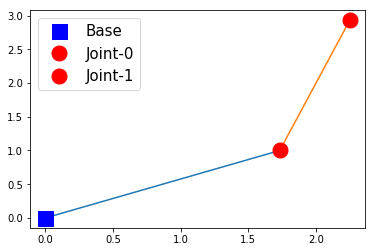

In [12]:
# Plot the links
#plt.plot([base_x, pos_x[0]], [base_y, pos_y[0]])
for i in range(n):
    plt.plot([pos_x[i], pos_x[i+1]], [pos_y[i], pos_y[i+1]])
# Plot the base as a blue square
plt.plot(base_x, base_y, 'bs', markersize=15, label='Base')
# Plot Joint-1 as a red circle
for i in range(n):
    plt.plot(pos_x[i+1], pos_y[i+1], 'ro', markersize=15, label='Joint-'+str(i))
# Plot End Effector as a green triangle
#plt.plot(p2_x, p2_y, 'g^', markersize=15, label='End Effector')
#plt.xlim(-50, 50)
#plt.ylim(-50, 50)
plt.legend(fontsize=15)
plt.show() 